In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FRAME_SIZE = 1024
N_MELS = 128
N_MFCC = 40
N_FTT = 1024
HOP_LENGTH = 512
POWER = 2.0

### Load sample audio

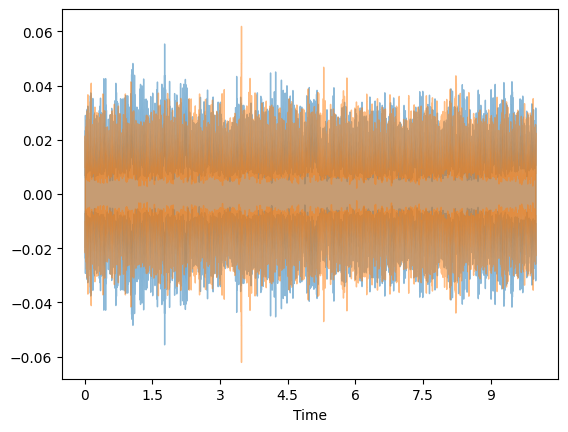

In [4]:
file = "data/dev/fan/train/normal_id_00_00000000.wav"
file2 = "data/dev/slider/train/normal_id_00_00000000.wav"
signal, sr = librosa.load(file, sr=16000)
signal2, sr2 = librosa.load(file2, sr=16000)

librosa.display.waveshow(signal, sr=sr, alpha=0.5)
librosa.display.waveshow(signal2, sr=sr2, alpha=0.5)


### Calculate time domain features

#### Amplitude Envelope & Root Mean Square Energy

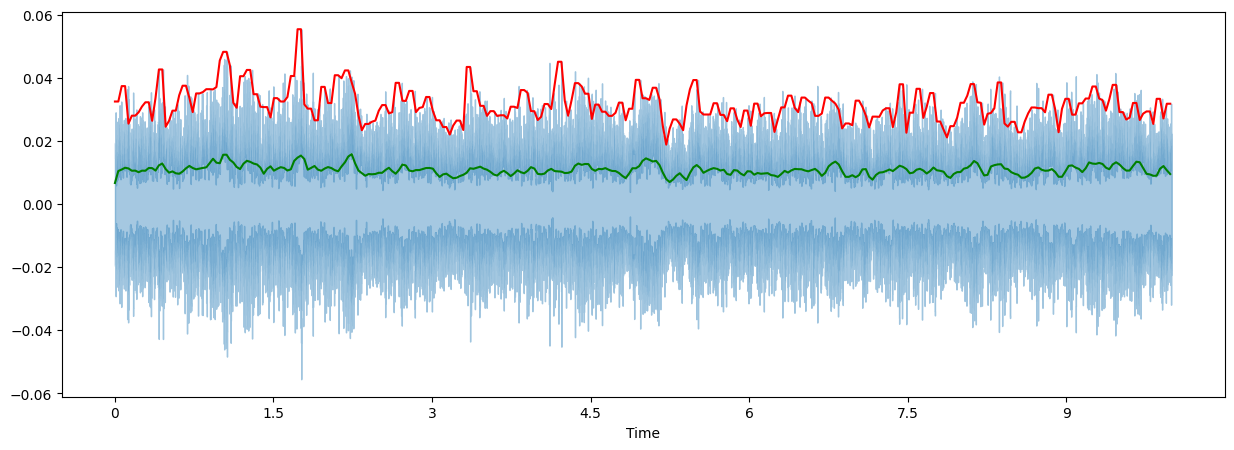

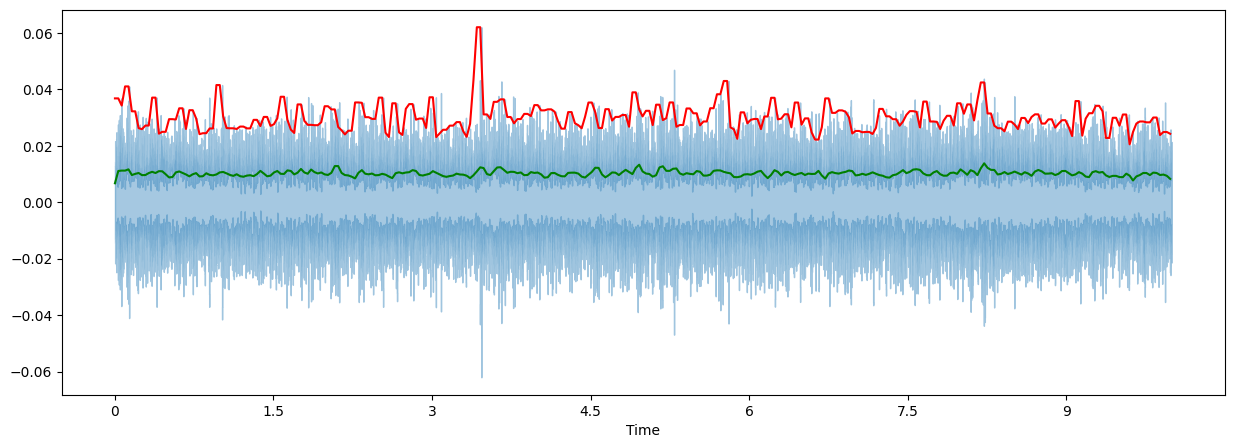

In [5]:
ae = np.array([max(signal[i:i+FRAME_SIZE]) for i in range(0, len(signal), HOP_LENGTH)])
ae2 = np.array([max(signal2[i:i+FRAME_SIZE]) for i in range(0, len(signal2), HOP_LENGTH)])

rms = librosa.feature.rms(y=signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms2 = librosa.feature.rms(y=signal2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
t = librosa.frames_to_time(range(len(ae)), sr=sr, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(signal, sr=sr, alpha=0.4)
plt.plot(t, ae, color="r")
plt.plot(t, rms, color="g")

plt.figure(figsize=(15, 5))
librosa.display.waveshow(signal2, sr=sr2, alpha=0.4)
plt.plot(t, ae2, color="r")
plt.plot(t, rms2, color="g")

plt.show()

### Frequency domain features

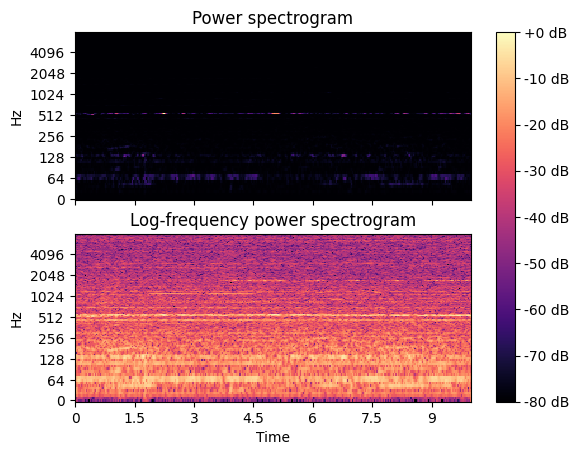

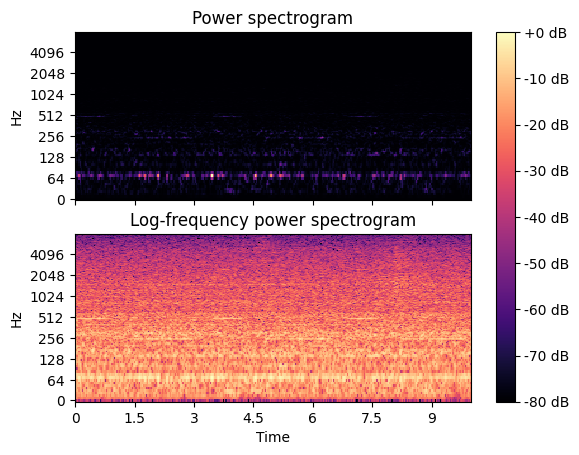

In [6]:
S = np.abs(librosa.stft(signal))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
imgpow = librosa.display.specshow(S**2, sr=sr, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img_db = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
fig.colorbar(img_db, ax=ax, format="%+2.f dB")
plt.show()

S2 = np.abs(librosa.stft(signal2))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
imgpow = librosa.display.specshow(S2**2, sr=sr2, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img_db = librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max), sr=sr2, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
fig.colorbar(img_db, ax=ax, format="%+2.f dB")
plt.show()

#### Mel spectrogram, spectral centroid and bandwidth

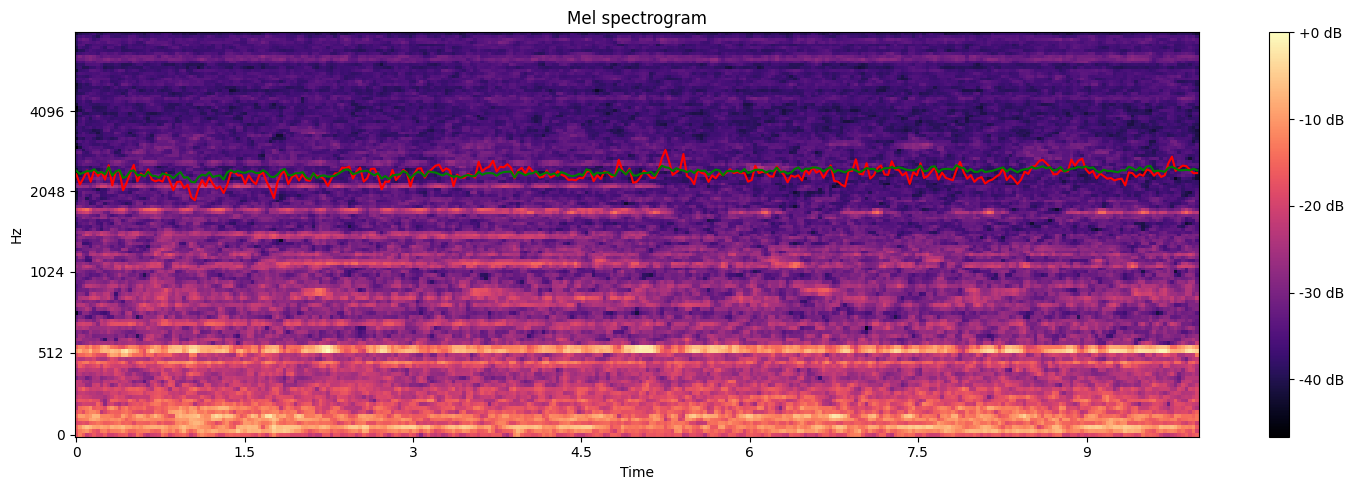

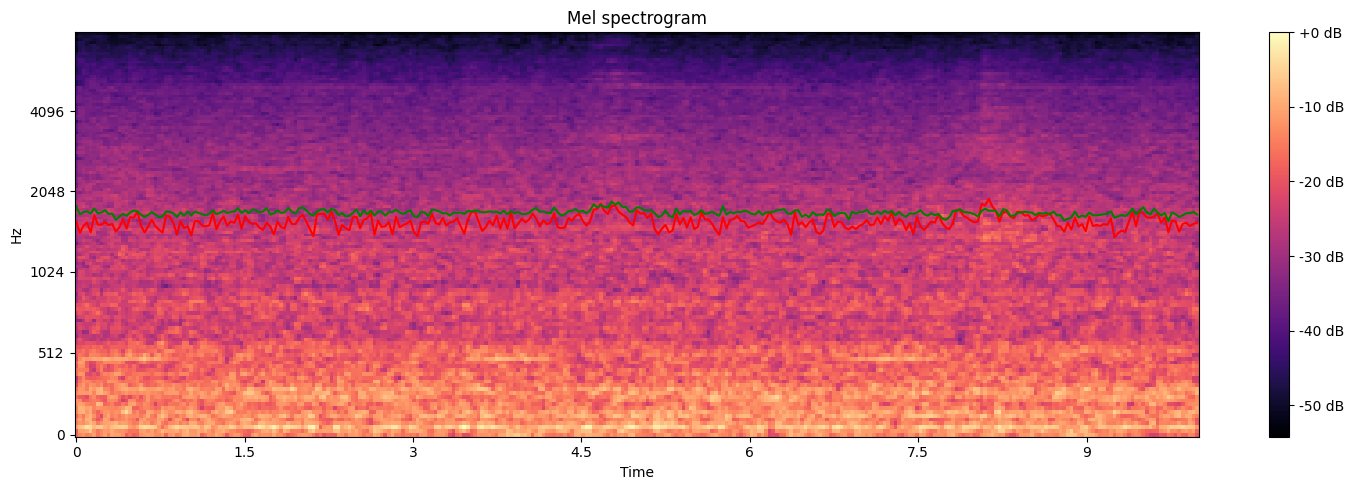

In [7]:
S_mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=N_MELS)
sc = librosa.feature.spectral_centroid(y=signal, sr=sr, n_fft=N_FTT, hop_length=HOP_LENGTH).squeeze()
sb = librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=N_FTT, hop_length=HOP_LENGTH).squeeze()
t = librosa.frames_to_time(range(sc.shape[0]), sr=sr, hop_length=HOP_LENGTH)
plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.power_to_db(S_mel, ref=np.max), sr=sr, y_axis='mel', x_axis='time', hop_length=HOP_LENGTH, fmax=8000, n_fft=N_FTT)
plt.plot(t, sc, color="r")
plt.plot(t, sb, color="g")
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

S_mel2 = librosa.feature.melspectrogram(y=signal2, sr=sr2, n_mels=N_MELS)
sc2 = librosa.feature.spectral_centroid(y=signal2, sr=sr2, n_fft=N_FTT, hop_length=HOP_LENGTH).squeeze()
sb2 = librosa.feature.spectral_bandwidth(y=signal2, sr=sr2, n_fft=N_FTT, hop_length=HOP_LENGTH).squeeze()
plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.power_to_db(S_mel2, ref=np.max), sr=sr2, y_axis='mel', x_axis='time', hop_length=HOP_LENGTH, fmax=8000, n_fft=N_FTT)
plt.plot(t, sc2, color="r")
plt.plot(t, sb2, color="g")
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

#### Mel spectral envelope

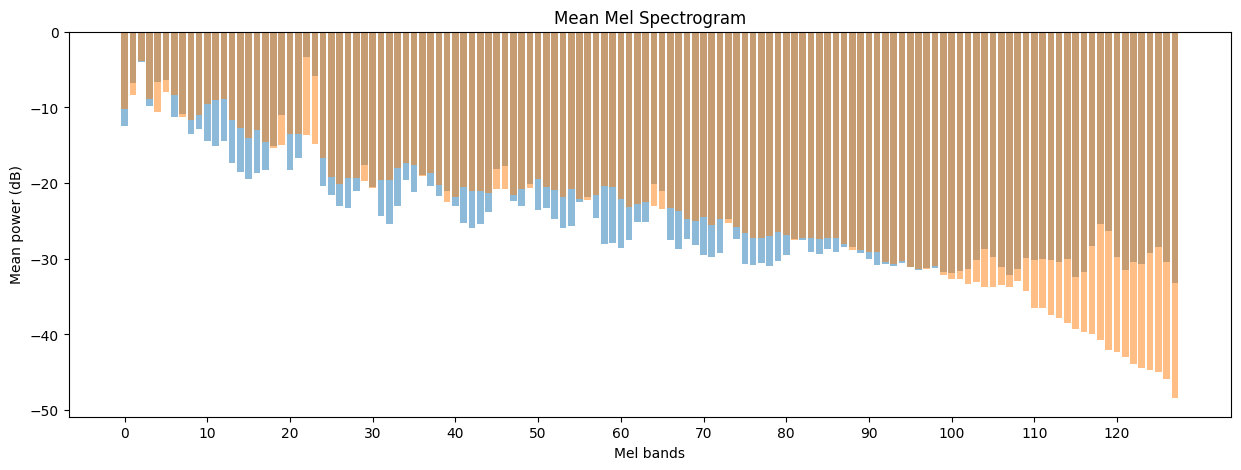

In [8]:
plt.figure(figsize=(15, 5))
plt.bar(x=range(S_mel.shape[0]), height=librosa.power_to_db(S_mel).mean(axis=1), alpha=0.5)
plt.bar(x=range(S_mel2.shape[0]), height=librosa.power_to_db(S_mel2).mean(axis=1), alpha=0.5)
plt.xticks(range(0, S_mel.shape[0], 10))
plt.xlabel("Mel bands")
plt.ylabel("Mean power (dB)")
plt.title("Mean Mel Spectrogram")
plt.show()

#### Spectral envelope

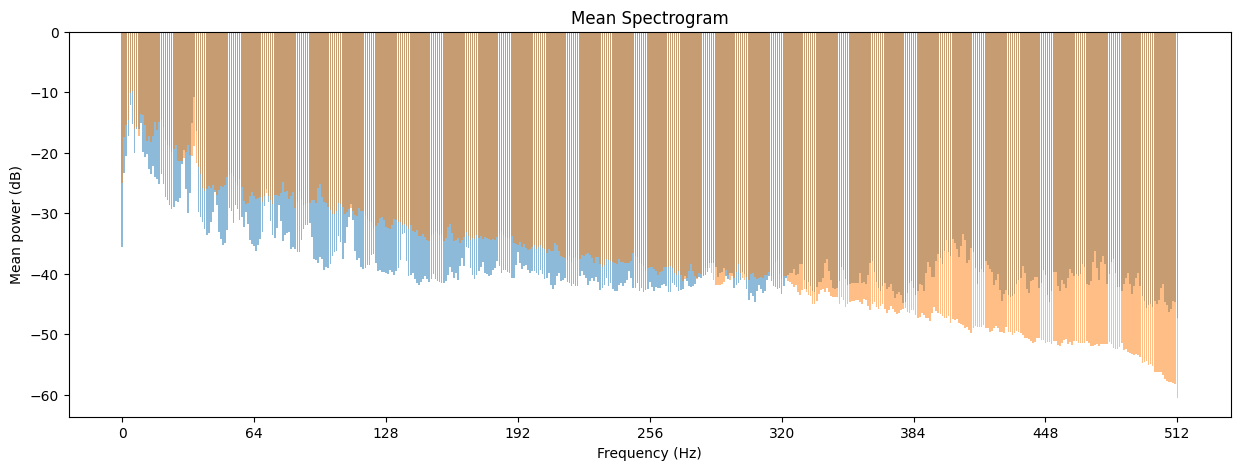

In [9]:
spec = librosa.stft(signal, n_fft=N_FTT, hop_length=HOP_LENGTH)
spec2 = librosa.stft(signal2, n_fft=N_FTT, hop_length=HOP_LENGTH)
spec_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
spec_db2 = librosa.amplitude_to_db(np.abs(spec2), ref=np.max)

plt.figure(figsize=(15, 5))
plt.bar(x=range(spec_db.shape[0]), height=spec_db.mean(axis=1), alpha=0.5)
plt.bar(x=range(spec_db2.shape[0]), height=spec_db2.mean(axis=1), alpha=0.5)
plt.xticks(range(0, spec_db.shape[0], 64))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mean power (dB)")
plt.title("Mean Spectrogram")
plt.show()